In [47]:
import numpy as np

### Load our pretrained model

In [48]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

### Load our new images and test the autoencoder on this new symbol

In [49]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [50]:
# load 5 sample images

images = []
for i in range(5):
    img = tf.keras.utils.load_img(f'A{i+1}.png', target_size=(28, 28), color_mode="grayscale")
    images.append(img)

In [51]:
images = []

In [52]:
# load 5 sample images
img1 = tf.keras.utils.load_img(f'A1.png', target_size=(28, 28), color_mode="grayscale")
img2 = tf.keras.utils.load_img(f'A2.png', target_size=(28, 28), color_mode="grayscale")
img3 = tf.keras.utils.load_img(f'A3.png', target_size=(28, 28), color_mode="grayscale")
img4 = tf.keras.utils.load_img(f'A4.png', target_size=(28, 28), color_mode="grayscale")
img5 = tf.keras.utils.load_img(f'A5.png', target_size=(28, 28), color_mode="grayscale")

In [53]:
images.append(img1)
images.append(img2)
images.append(img3)
images.append(img4)
images.append(img5)

In [54]:
images

[<PIL.Image.Image image mode=L size=28x28 at 0x237F4E14B20>,
 <PIL.Image.Image image mode=L size=28x28 at 0x23787BAD400>,
 <PIL.Image.Image image mode=L size=28x28 at 0x23787BAD460>,
 <PIL.Image.Image image mode=L size=28x28 at 0x23787BAD490>,
 <PIL.Image.Image image mode=L size=28x28 at 0x23787BAD430>]

### Predicting the 5 images

In [55]:
input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/255  # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)  # Convert images to a batch of images

predictions = pretrained_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 52ms/step
(5, 784)


### display the images and their reconstructions side by side

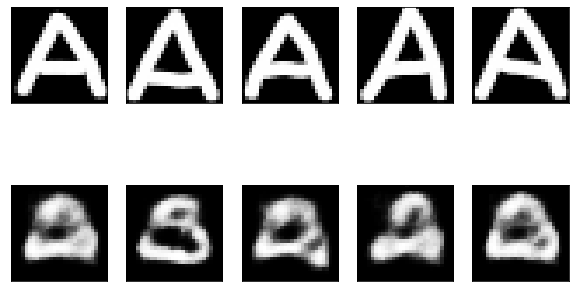

In [56]:
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap="gray")
    
    plt.subplot(2, 5, i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predictions[i].reshape(28, 28), cmap="gray")

plt.show()

In [57]:
from tensorflow.keras.datasets import mnist

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [58]:
# Flatten the images for an autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [59]:
# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

### combine the new bad images with the training data.

In [60]:
input_arrs = np.array(input_arrs)
bad_images = np.repeat(input_arrs, 15, axis=0)#oversampling the data
new_image_set = np.vstack((train_images[:500], bad_images))#ony 500 subset from the main dataset
np.random.shuffle(new_image_set)

In [61]:
new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

In [62]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with updated data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)



Epoch 1/15
1/1 [==============================] - 0s 472ms/step - loss: 0.1842 - val_loss: 0.1679
Epoch 2/15
1/1 [==============================] - 0s 64ms/step - loss: 0.1698 - val_loss: 0.1431
Epoch 3/15
1/1 [==============================] - 0s 49ms/step - loss: 0.1420 - val_loss: 0.1427
Epoch 4/15
1/1 [==============================] - 0s 51ms/step - loss: 0.1408 - val_loss: 0.1390
Epoch 5/15
1/1 [==============================] - 0s 57ms/step - loss: 0.1350 - val_loss: 0.1378
Epoch 6/15
1/1 [==============================] - 0s 56ms/step - loss: 0.1322 - val_loss: 0.1326
Epoch 7/15
1/1 [==============================] - 0s 56ms/step - loss: 0.1253 - val_loss: 0.1295
Epoch 8/15
1/1 [==============================] - 0s 60ms/step - loss: 0.1202 - val_loss: 0.1268
Epoch 9/15
1/1 [==============================] - 0s 58ms/step - loss: 0.1148 - val_loss: 0.1247
Epoch 10/15
1/1 [==============================] - 0s 64ms/step - loss: 0.1106 - val_loss: 0.1217
Epoch 11/15
1/1 [===========

### Test the model on the original test set

313/313 [==============================] - 1s 3ms/step


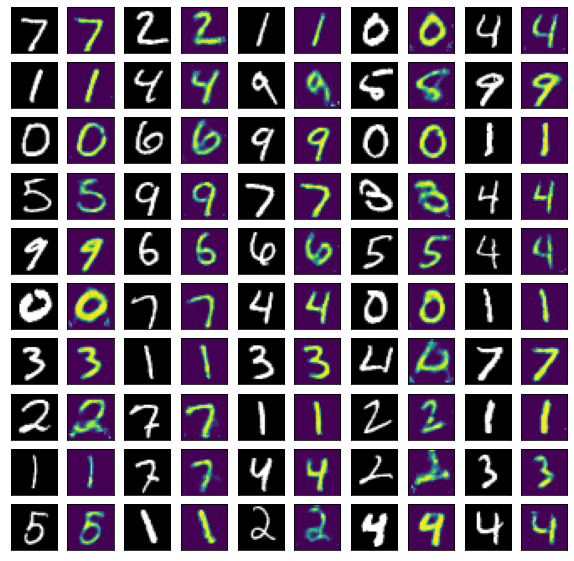

In [63]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()


### Test the model on the new test set

In [64]:

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

# load 5 sample images
images = []
for i in range(5):
    img_path = f'A{i+1}.png'
    img = tf.keras.utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
    images.append(img)
    
# predict the images from this sample
input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/ 255 # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)
predictions = updated_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 26ms/step
(5, 784)


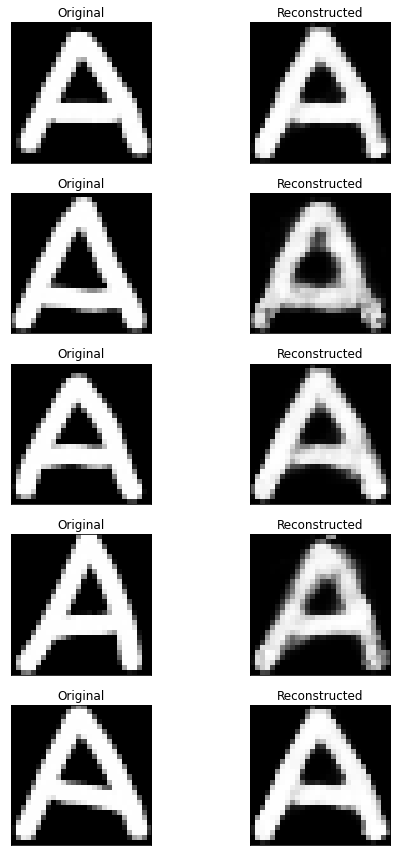

In [65]:
# display the images and their reconstructions side by side
# 
rows = 5
cols = 2
fig, axs = plt.subplots(rows,cols,figsize=(8,12))

for i in range(rows):
    axs[i,0].imshow(images[i], cmap="gray")
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    axs[i,0].set_title("Original")
    
    axs[i,1].imshow(predictions[i].reshape(28,28), cmap="gray")
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])
    axs[i,1].set_title("Reconstructed")

plt.tight_layout()
plt.show()

### Saving the autoencoder

In [67]:
updated_model.save('updated_autoencoder_Akhil.h5')